In [1]:
import matplotlib.pyplot as plt
import pandas as pd


### Data extraction


In [ ]:
import requests
from bs4 import BeautifulSoup
from openpyxl.workbook import Workbook
url='https://www.imdb.com/chart/top/'
headers = {'User-Agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_11_5) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/50.0.2661.102 Safari/537.36'}
content=requests.get(url,headers=headers)
content=content.content
soup=BeautifulSoup(content,'html.parser')
print(soup.title)
list=(soup.find_all('a',class_="ipc-title-link-wrapper" ))
movies={}
for i in list:movies[i.getText()]= {'year':0,'runtime':0,'certificate':0}
date=soup.find_all('li',class_="ipc-metadata-list-summary-item sc-59b6048d-0 cuaJSp cli-parent")
txt=[]
for d in date:
    txt.append(d.getText())
year=[]
namel=[]
runtime=[]
certificate=[]
rate=[]
vote=[]

for item in txt:
    namel.append(item.split('. ')[1].rsplit(' ', 1)[0])
for item in namel:
    hr=''
    for i in range(len(item)-1,0,-1):
        if item[i] == 'h':
            hr += item[i - 1]
            break
    runtime.append(hr)
data=[]
min=[]
for item in txt:
    data.append(item.split('. ')[1].rsplit(' ', 1))
for d in data:
    try:
        min.append(d[1])
    except Exception:
        min.append('null');pass
for i in range(len(min)):
    m='.'
    if min[i] == 'null': continue
    for j in range(len(min[i])):
        if min[i][j]=='m':break
        else:
            m+=min[i][j]
    runtime[i]+=m

for i in range(len(min)):
    min[i]=min[i][3:]
for i in range(len(min)):
    c=''
    for i in min[i]:
        if i.isdigit():
            break
        else:
            c+=i

    certificate.append(c)
for i in range(len(min)):
    r=''
    for j in range(len(min[i])):
        if min[i][j].isdigit():
            r+=min[i][j]
            r+=min[i][j+1]
            r+=min[i][j+2]
            break
    rate.append(r)

for i in range(len(min)):
    v=''
    pick=False
    for j in range(len(min[i])):
        if min[i][j]=='(':
            pick=True
            continue
        if min[i][j] == ')':
            pick=False
            break
        if pick:
            v+=min[i][j]

    vote.append(v)

for i in range(len(namel)):
    namel[i]=namel[i][:-2]
for i in range(len(namel)):
    year.append(namel[i][-4:])
wb=Workbook()
sheet=wb.active
sheet.title = 'imdb'
header=['name','year',"runtime",'certificate','rate','vote']
sheet.append(header)

for i in range(250):
    sheet.append([namel[i],year[i],runtime[i],certificate[i],rate[i],vote[i]])
wb.save(filename = 'imdb_data.xlsx')


## ANALYSIS


In [2]:
df=pd.read_csv('imdb_data_c.csv')
try:
    df['year']=pd.to_numeric(df['year'])
    df['runtime']=pd.to_numeric(df['runtime'])
    df['rate']=pd.to_numeric(df['rate'])
    df['certificate'].replace(' ',Null)
    df['vote']=df['vote'].replace('na',0)
    df['vote']=df['vote'].replace('nan',0)

except Exception:pass
for i in range(len(df['vote'])):
    a=df['vote'][i]
    a=str(a)[-1]
    df['vote'][i]=str(df['vote'][i])[:-1]
    if a=='m' or a=='M':
        df['vote'][i]=float(df['vote'][i])*1000000
    elif a=='k' or a=="K":
        df['vote'][i]=float(df['vote'][i])*1000
    else:pass
df

C:\Users\Nagasheshu\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.7_qbz5n2kfra8p0\LocalCache\local-packages\Python37\site-packages\ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\Nagasheshu\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.7_qbz5n2kfra8p0\LocalCache\local-packages\Python37\site-packages\ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\Nagasheshu\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.7_qbz5n2kfra8p0\LocalCache\local-packages\Python37\site-packages\ipykernel_launcher.py:18: SettingWithCopyWarning: 
A v

,name,year,runtime,certificate,rate,vote
0,The Shawshank Redemption1994,1994,2.22,A,9.3,2800000.0
1,The Godfather1972,1972,2.55,A,9.2,2000000.0
2,The Dark Knight2008,2008,2.32,UA,9.0,2800000.0
3,The Godfather: Part II1974,1974,3.22,A,9.0,1300000.0
4,12 Angry Men1957,1957,1.36,U,9.0,840000.0
...,...,...,...,...,...,...
241,The 400 Blows1959,1959,1.39,U,8.1,125000.0
242,Aladdin1992,1992,1.30,U,8.0,453000.0
243,Persona19661h 25mN,1966,1.25,Passed,8.1,128000.0
244,Dances with Wolves1990,1990,3.1,NaN,8.0,284000.0


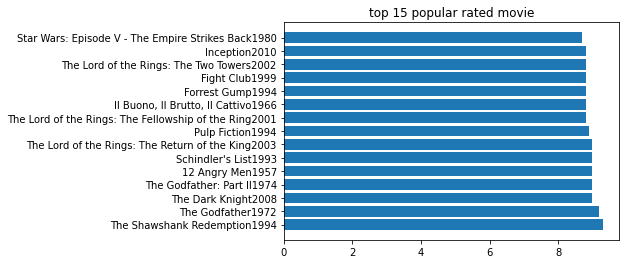

In [3]:
plt.barh(df['name'][:15],width=df['rate'][:15])
plt.title("top 15 popular rated movie")
plt.show()

## finding which year released most popular movies


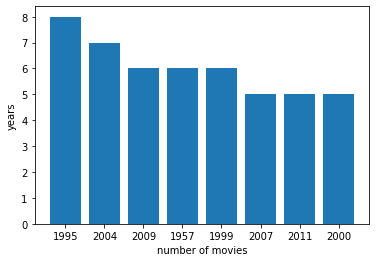

In [4]:
plt.bar(df['year'].value_counts()[:8].index,df['year'].value_counts().values[:8])
plt.xlabel("number of movies")
plt.ylabel("years")
plt.show()

## popular movie certifications

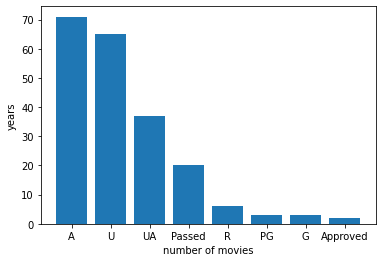

In [5]:
plt.bar(df['certificate'].value_counts()[:8].index,df['certificate'].value_counts().values[:8])
plt.xlabel("number of movies")
plt.ylabel("years")
plt.show()

## Movie with high votes

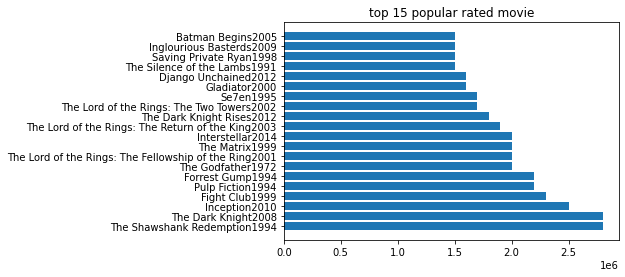

In [7]:
z=zip(df['name'],df['vote'])
df['vote']=df['vote'].replace('na',0)
df['vote']=pd.to_numeric(df['vote'])
z=sorted(z,key=lambda x:int(x[1]),reverse=True)
names=[item[0] for item in z]
votes=[int(item[1]) for item in z]
plt.barh(names[:20],width=votes[:20])
plt.title("top 15 popular rated movie")
plt.show()

In [ ]:
## runtime


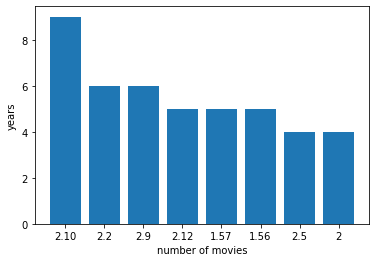

average runtime: 1.9999186991869915


In [8]:
plt.bar(df['runtime'].value_counts()[:8].index,df['runtime'].value_counts().values[:8])
plt.xlabel("number of movies")
plt.ylabel("years")
plt.show()
s=0
for i in df['runtime']:
    try:
        n=float(i)
        if str(n).isalpha():continue
        s+=n
    except Exception as e:pass
print('average runtime:',s/len(df['runtime']))

,rate,vote,year
rate,1.000000,-0.013569,0.050993
vote,-0.013569,1.000000,0.169445
year,0.050993,0.169445,1.000000


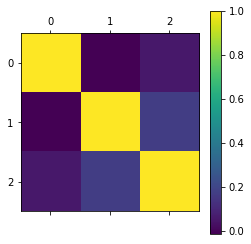

In [20]:
df['rate']=df['rate'].fillna(0)
df['vote']=df['vote'].fillna(0)
df['vote']=df['vote'].replace('na',0)
df['year']=df['year'].replace('40mN',0)
df['year']=df['year'].replace(' 1mN',0)
df['year']=df['year'].fillna(0)
df['year']=pd.to_numeric(df['year'])
cor=df[['rate','vote','year']].corr()
fig=plt.matshow(cor)
plt.colorbar(fig)
cor